<a href="https://colab.research.google.com/github/dhar9571/Capstone-Project-Unsupervised-ML---Netflix-Dataset/blob/main/Capstone_Project_Unsupervised_ML_Netflix_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

**Objective**:
The objective of this project is to apply machine learning clustering techniques to the Netflix Movies and Shows dataset in order to group similar movies and TV shows together. By doing so, we aim to uncover patterns and similarities among the content available on Netflix, which can help in content recommendation systems and content categorization.

**Dataset**:
The dataset used in this project is sourced from Netflix and contains information about various movies and TV shows available on the platform. The dataset includes features such as title, director, cast, description, genre, release year, country, and ratings.

**Methodology**:

**Data Preprocessing**:

**Handle missing values**: Check for and handle missing values in the dataset.
Feature selection: Decide which features are relevant for clustering (e.g., genre, release year, country, etc.).
Feature engineering: Convert categorical features into numerical representations (e.g., one-hot encoding) and normalize numerical features.

**Dimensionality Reduction** (Optional):

If the dataset has a large number of features, perform dimensionality reduction techniques (e.g., Principal Component Analysis) to reduce the feature space and improve clustering performance.

**Clustering Algorithm Selection**:

Select appropriate clustering algorithms for the task. Common choices include K-Means, Hierarchical Clustering, and DBSCAN.

**Clustering**:

Apply the chosen clustering algorithm(s) to the preprocessed dataset to group similar movies and TV shows together.
Experiment with different values of hyperparameters (e.g., number of clusters for K-Means) and evaluate the results using internal clustering metrics like Silhouette Score, Davies-Bouldin index, etc.

**Interpretation and Visualization**:

Visualize the clustered data to gain insights into the grouping patterns and identify any interesting clusters.
Analyze the characteristics of each cluster and give meaningful names to the clusters if possible.

**Evaluation**:

Assess the quality of the clustering results. This can be done through visual inspection and, if available, by comparing the clusters with existing metadata (e.g., genre, release year, etc.).
If ground truth labels are available, external evaluation metrics like Adjusted Rand Index or Normalized Mutual Information can be used.

**Recommendations**:

Based on the clustering results, build a content recommendation system that suggests similar movies or TV shows to users based on their viewing history or preferences.

**Deployment**
Deploy the clustering model and the recommendation system in a user-friendly interface (web application, mobile app, etc.).

# **GitHub Link -**

https://github.com/dhar9571/Clustering-Project-Unsupervised---Netflix-Movies-and-TV-Shows-DatasetML.git

# **Problem Statement**


Netflix, the world's leading streaming entertainment service, hosts an extensive library of movies and TV shows catering to a diverse audience. With such a vast collection, it becomes challenging for users to discover content that aligns with their preferences. To enhance user experience and improve content recommendation, the goal of this project is to perform clustering analysis on the Netflix Movies and Shows dataset.

The Netflix Movies and Shows dataset contains a wealth of information about the content available on the platform. Each entry in the dataset represents a movie or a TV show and includes features such as title, director, cast, description, genre, release year, country, and ratings. The objective is to apply machine learning clustering techniques to group similar movies and TV shows together.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Dataset Loading

In [2]:
# mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Project Unsupervised ML - Netflix Dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look

# setting up to show all features

pd.set_option('display.max_columns',None)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 7787
Number of columns: 12


### Dataset Information

In [6]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Missing Values Heatmap')

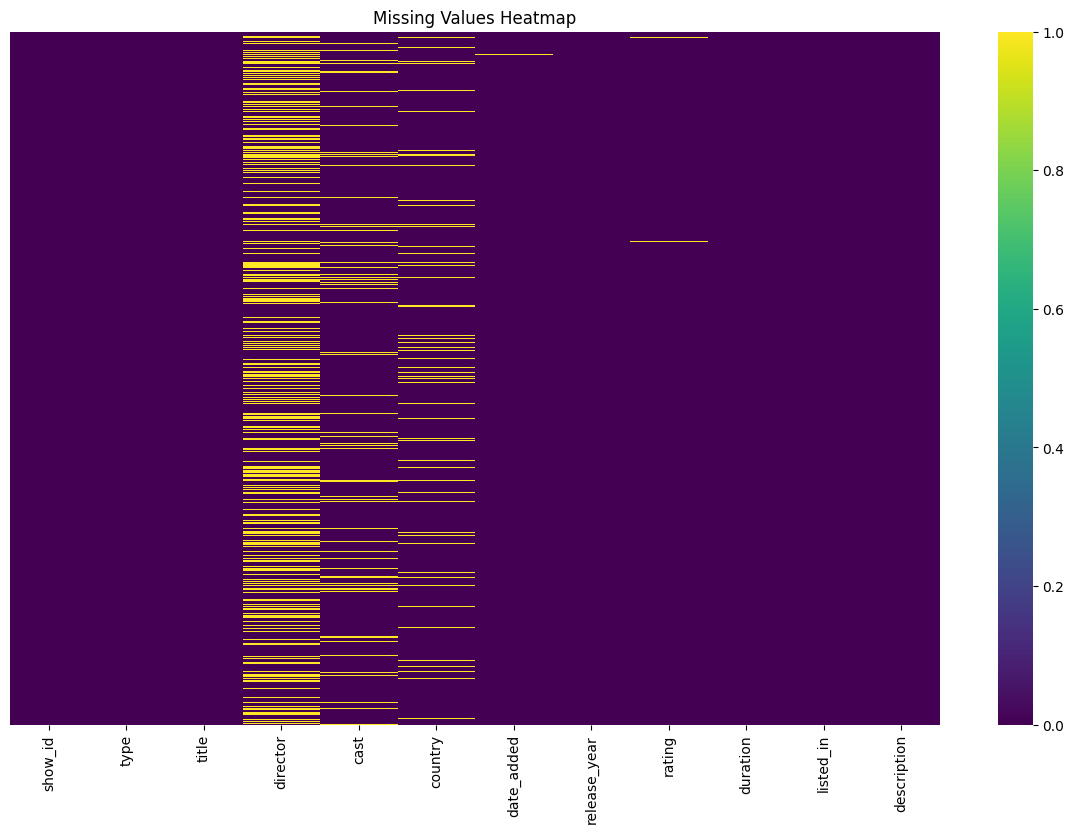

In [ ]:
# Visualizing the missing values

# setting up plot size

plt.figure(figsize=(15, 9))

sns.heatmap(df.isna(),yticklabels=False,cbar=True,cmap='viridis')
plt.title("Missing Values Heatmap")

### What did you know about your dataset?

1. The dataset has 7787 number of rows and 12 features.
2. The dataset has no duplicate values.
3. The dataset has 2389 null values in director columns, 718 null values in cast column, 507 in country column, 10 values in date_added column and 7 null values in rating column.
4. Currently the dataset has only 1 numerical feature which is release_year.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

**show_id**: A unique identifier for each movie or TV show in the dataset.

**type**: Indicates whether the entry is a "Movie" or a "TV Show."

**title**: The title of the movie or TV show.

**director**: The director(s) of the movie or TV show. In the case of TV shows, this field may be blank or contain multiple directors.

**cast**: The main cast or actors involved in the movie or TV show. This field may contain multiple actors' names.

**country**: The country of origin for the movie or TV show.

**date_added**: The date when the movie or TV show was added to the Netflix platform.

**release_year**: The year when the movie or TV show was originally released.

**rating**: The content rating assigned to the movie or TV show (e.g., PG, TV-MA, etc.).

**duration**: The duration of the movie or TV show, typically represented in minutes for movies and seasons for TV shows.

**listed_in**: The genre(s) or category(s) in which the movie or TV show is classified.

**description**: A brief description or synopsis of the movie or TV show.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

df.nunique().reset_index().rename(columns = {'index':'column',0:'unique_values'}).sort_values(by='unique_values',ascending=False)

,column,unique_values
0,show_id,7787
2,title,7787
11,description,7769
4,cast,6831
3,director,4049
6,date_added,1565
5,country,681
10,listed_in,492
9,duration,216
7,release_year,73


## 3. ***Data Wrangling***

### Data Wrangling Code

Write your code to make your dataset analysis ready.

In [13]:
# remove the rows where date_added is null as number of empty rows are below 5% of total observations.

df = df[~df.date_added.isna()]

In [15]:
# remove the rows where rating is null as number of empty rows are below 5% of total observations.

df = df[~df.rating.isna()]

In [33]:
# replace null values of country column with mode as it will not change the distribution of the data:

df.country.fillna(df.country.mode()[0],inplace=True)

In [40]:
# removing show_id column which has unique IDs for all the rows:

df.drop(columns=['show_id'],inplace=True, axis=1)

In [65]:
# replacing director and cast features' null values with 'unknown' as director column cannot be replaced with mode due to incorrect information:

df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)

In [ ]:
# creating new dataset to keep original dataset unchanged:

df1 = df

In [70]:
# For country and listed_in (genres) features, taking  only first values as main country and regions:

df1['country'] = df1['country'].apply(lambda x: x.split(',')[0])
df1['listed_in'] = df1['listed_in'].apply(lambda x: x.split(',')[0])

In [88]:
# sepearting the datasets for TV SHOW and Movies:

show = df1[df.type=='TV Show']
movies = df1[df.type=='Movie']

In [83]:
# removing the ' min' from duration of movies to convert values in integer:

df.duration = df.duration.apply(lambda x: x[:-4])

In [93]:
# changing the data type of duration for movies duration feature:
movies.duration = movies.duration.astype('int')

<ipython-input-93-7ba106763a9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.duration = movies.duration.astype('int')


### What all manipulations have you done and insights you found?

1. Removed the rows where date_added is null as number of empty rows are below 5% of total observations.
2. Removed the rows where rating is null as number of empty rows are below 5% of total observations.
3. Replaced null values of country column with mode as it will not change the distribution of the data.
4. Removed show_id column which has unique IDs for all the rows.
5. Replaced director and cast features' null values with 'unknown' as director column cannot be replaced with mode due to incorrect information.
6. For country and listed_in (genres) features, took  only first values as main country and regions.
7. Removed the ' min' from duration of movies to convert values in integer.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Show Type - Univariate

Text(0, 0.5, 'Count')

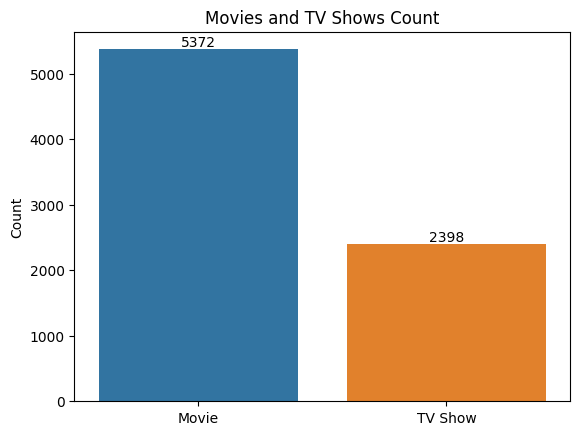

In [113]:
# Chart - 1 visualization code

ax = sns.barplot(x=df.type.value_counts().index,y=df.type.value_counts().values)

for count in ax.containers:
  ax.bar_label(count)

plt.title('Movies and TV Shows Count')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

1. The dataset contains a higher number of movies (5372) compared to TV shows (2398). This indicates that movies are more prevalent in the dataset than TV shows.
2. The higher count of movies suggests that the dataset may have a more diverse range of movies available for analysis compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of movies and TV shows in the dataset can inform content strategy and investment decisions. If the dataset reflects the actual content distribution on the platform, businesses can use this insight to optimize their content acquisition and production efforts. For example, they may choose to focus more on acquiring popular movies or producing original TV shows to cater to the audience's preferences.

#### Chart - 2 - Rating count - Univairate


Text(0, 0.5, 'Count')

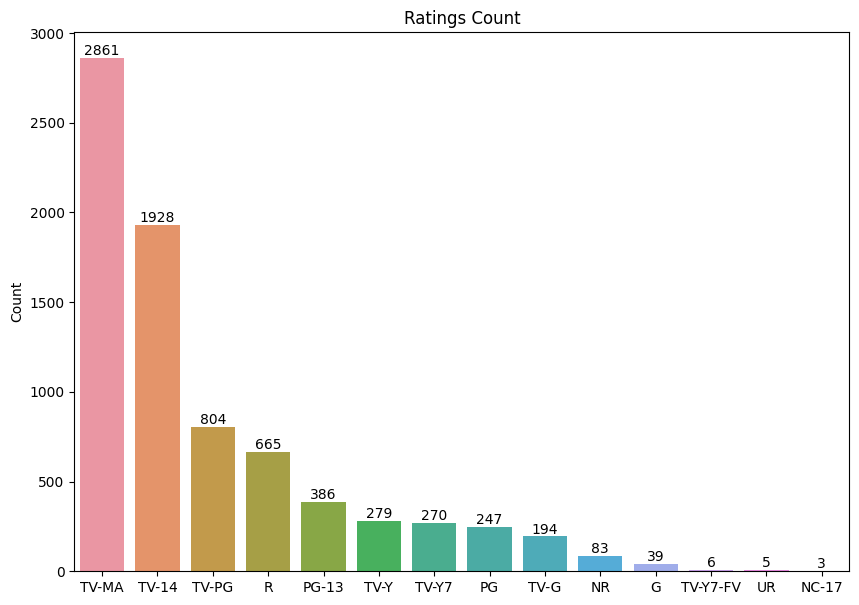

In [117]:
# Chart - 2 visualization code

plt.figure(figsize=(10,7))

ax = sns.barplot(x=df.rating.value_counts().index,y=df.rating.value_counts().values)

for count in ax.containers:
  ax.bar_label(count)

plt.title('Ratings Count')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

TV-MA, TV-14 and TV-PG ratings' movies have the highest counts which indiciates that movies and shows are mostly focused to these ratings.

#### Chart - 3 - Country Count - Univariate

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'France'),
  Text(6, 0, 'South Korea'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Turkey')])

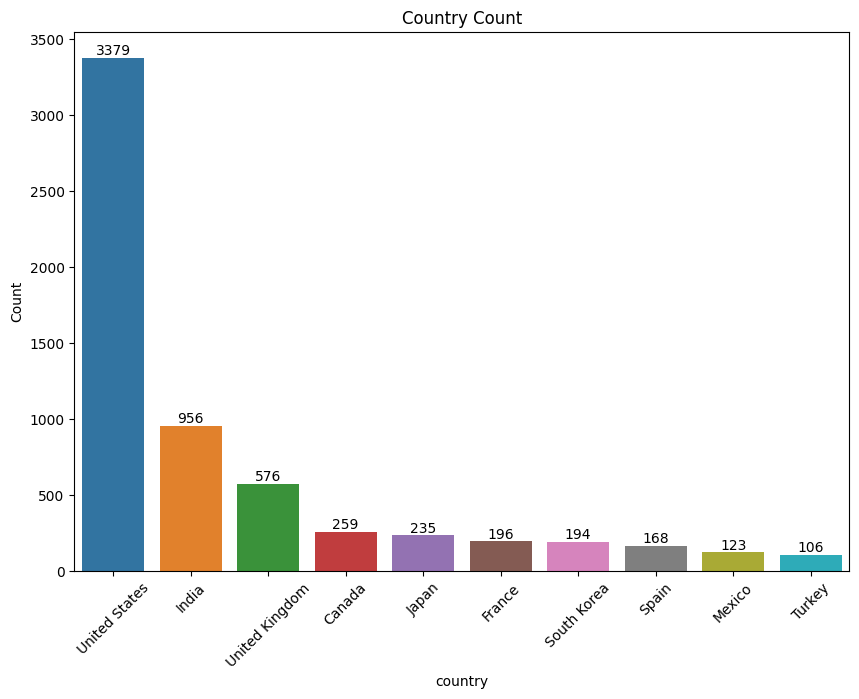

In [128]:
# Chart - 3 visualization code

# creating a dataset for country counts:

country_count = df1.country.value_counts().reset_index().rename(columns={'index':'country','country':'count'}).sort_values(by='count',ascending=False).head(10)

plt.figure(figsize=(10,7))

ax = sns.barplot(x=country_count["country"],y=country_count["count"])

for count in ax.containers:
  ax.bar_label(count)

plt.title('Country Count')
plt.ylabel('Count')
plt.xticks(rotation=45)

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies were primarily made in USA, India and United Kingdom.

#### Chart - 4 - Release Year Count - Univariate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '1925'),
  Text(1, 0, '1942'),
  Text(2, 0, '1943'),
  Text(3, 0, '1944'),
  Text(4, 0, '1945'),
  Text(5, 0, '1946'),
  Text(6, 0, '1947'),
  Text(7, 0, '1954'),
  Text(8, 0, '1955'),
  Text(9, 0, '1956'),
  Text(10, 0, '1958'),
  Text(11, 0, '1959'),
  Text(12, 0, '1960'),
  Text(13, 0, '1962'),
  Text(14, 0, '1963'),
  Text(15, 0, '1964'),
  Text(16, 0, '1965'),
  Text(17, 0, '1966'),
  Text(18, 0, '1967'),
  Text(19, 0, '1968'),
  Text(20, 0, '1969'),
  Text(21, 0, '1970'),
  Text(22, 0, '1971'),
  Text(23, 0, '1972'),
  Text(24, 0, '1973'),
  Text(25, 0, '1974'),
  Text(26, 0, '1975'),
  Text(27, 0, '1976'),
  Text(28, 0, '1977'),
  Text(29

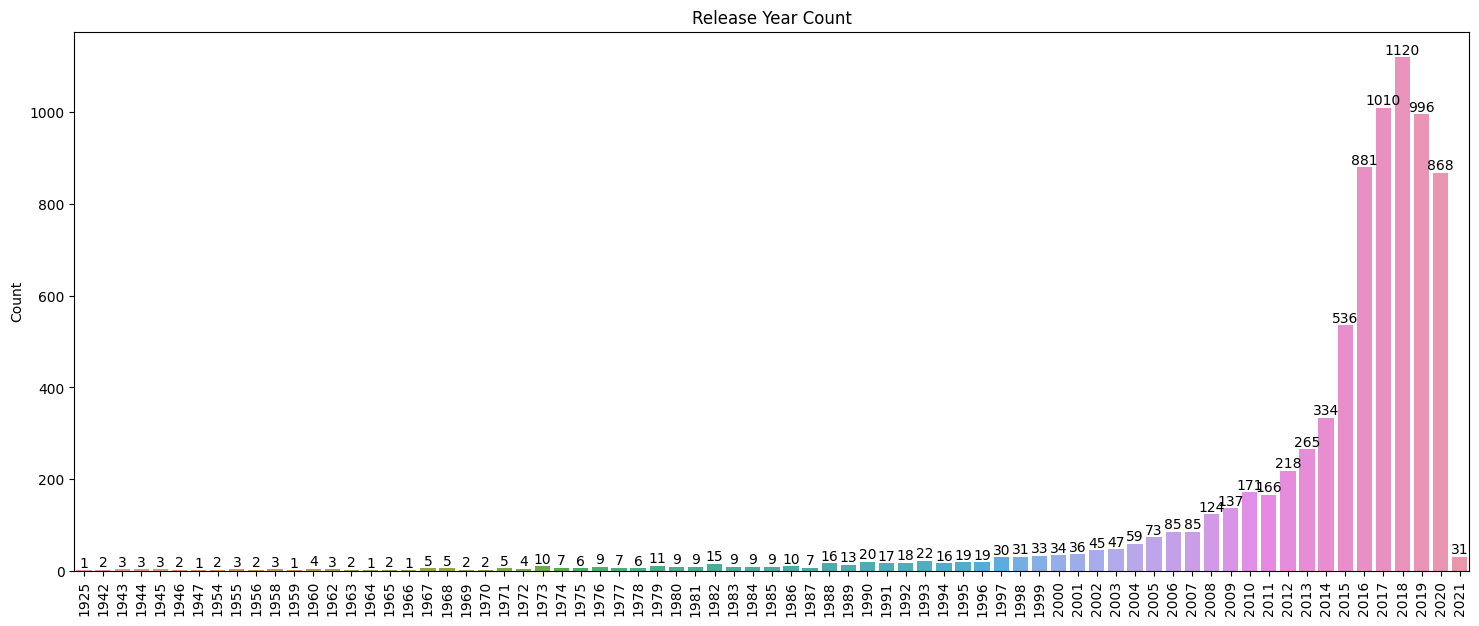

In [135]:
# Chart - 4 visualization code

plt.figure(figsize=(18,7))

ax = sns.barplot(x=df.release_year.value_counts().index,y=df.release_year.value_counts().values)

for count in ax.containers:
  ax.bar_label(count)

plt.title('Release Year Count')
plt.ylabel('Count')
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

Bar charts provide a clear and straightforward representation of the counts for each category. The length of each bar corresponds to the number of occurrences of each category, making it easy to understand the relative frequencies.

##### 2. What is/are the insight(s) found from the chart?

1. Most movies were released in 2017, 2018 and 2019 years.
2. Movies growth was significant in the decade of 2010.

#### Chart - 5 - Duration Distribution - Univariate

Text(0.5, 1.0, 'Duration Distribution')

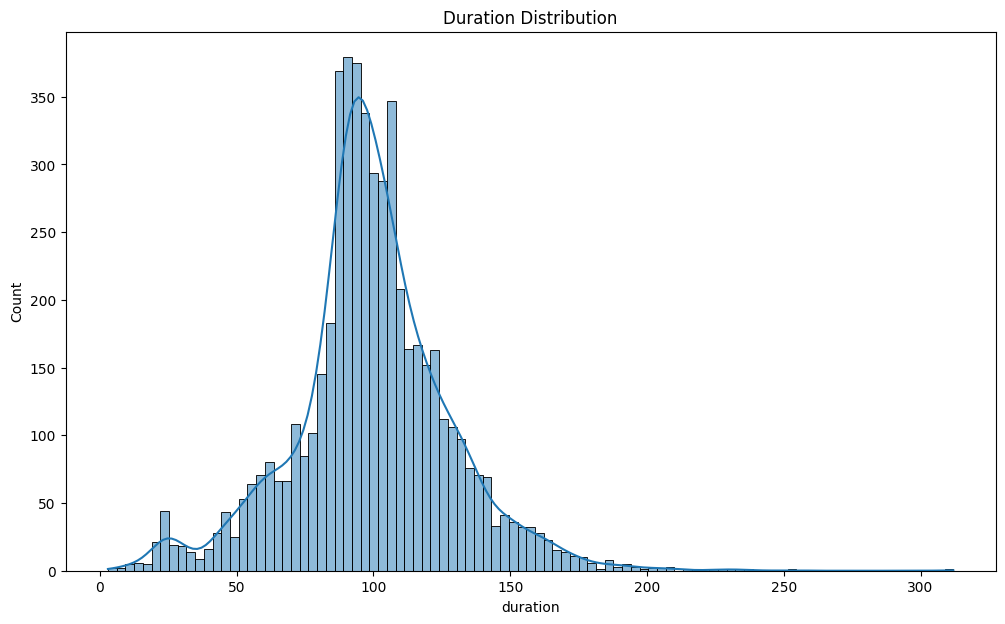

In [140]:
# Chart - 5 visualization code

plt.figure(figsize=(12,7))

sns.histplot(movies['duration'],kde=True)

plt.title('Duration Distribution')

##### 1. Why did you pick the specific chart?

Histograms provide a visual representation of the distribution of a dataset. They allow you to see how data is spread across different bins or intervals, giving insights into the central tendency, spread, and shape of the data.

##### 2. What is/are the insight(s) found from the chart?

1. Most movies are in the range from 80-130 minutes.
2. The distribution of the duration feature data is Normal.
3. Most of the movies' duration is centered arond the mean.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***